In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.graph_objects as go
import geopandas as gpd


In [202]:
#Path to csv 
trends_csv = Path("shopping_trends.csv")

#Converting CSV file to DataFrame.
trends_df = pd.read_csv(trends_csv)
trends_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [132]:
# Checking number of rows and columns
trends_df.shape

(3900, 19)

In [176]:
# Getting Column Names
trends_df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [177]:
# Obtaining total number of purchases for each category
trends_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [316]:
location_df= trends_df[["Location","Category"]]
location_df.head()

,Location,Category
0,Kentucky,Clothing
1,Maine,Clothing
2,Massachusetts,Clothing
3,Rhode Island,Footwear
4,Oregon,Clothing


## **Statistics**

In [304]:
# Total Purchase amount for each Category
total_purchase_by_category = trends_df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [305]:
# Total amount of purchases for each location 
total_purchases_for_each_location = trends_df.groupby("Location")["Purchase Amount (USD)"].sum()
print("Total number of purchases for each location are:")
print(total_purchases_for_each_location)

Total number of purchases for each location are: 
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      423

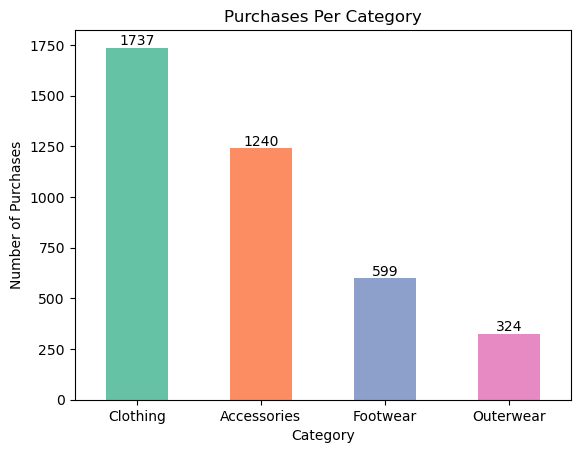

In [315]:
# Purchases for each category
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

categories = trends_df["Category"].value_counts()

categories.plot(kind='bar',
                   xlabel='Category',
                   ylabel='Number of Purchases',
                   legend=False,
                   title='Purchases Per Category',
                   color = colors,
                   )

# Annotate each bar with its count
for i, count in enumerate(categories):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


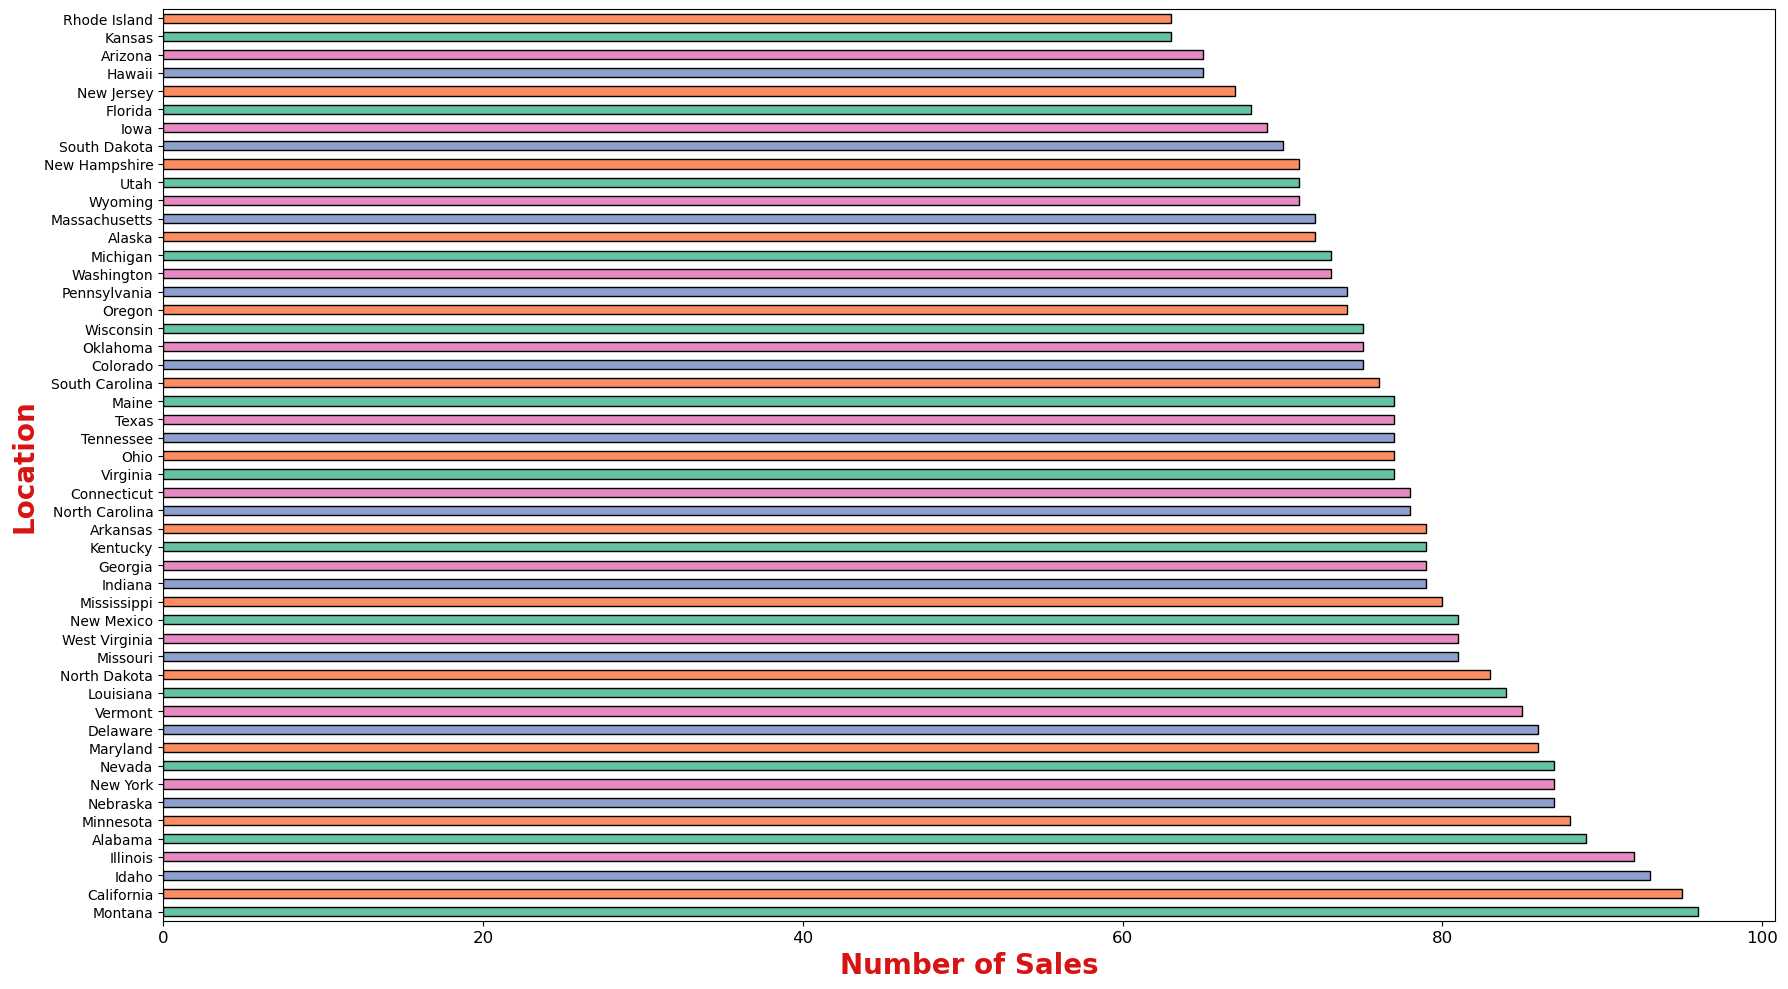

In [216]:
# Total Number of sales  bar graph 
plt.figure(figsize = (18, 10))
trends_df["Location"].value_counts().plot(kind = 'barh', color =colors, edgecolor = 'black')
plt.ylabel('Location', weight = "bold", color = "#D71313", fontsize = 20)
plt.xlabel('Number of Sales', weight = "bold", color = "#D71313", fontsize = 20)
plt.xticks(rotation = 0, fontsize = 12)
plt.tight_layout()
plt.show()
# [:15].sort_values(ascending = False)

In [322]:
location_category_df= trends_df.loc[:,["Category","Location"]]
location_category_df.head()

,Category,Location
0,Clothing,Kentucky
1,Clothing,Maine
2,Clothing,Massachusetts
3,Footwear,Rhode Island
4,Clothing,Oregon


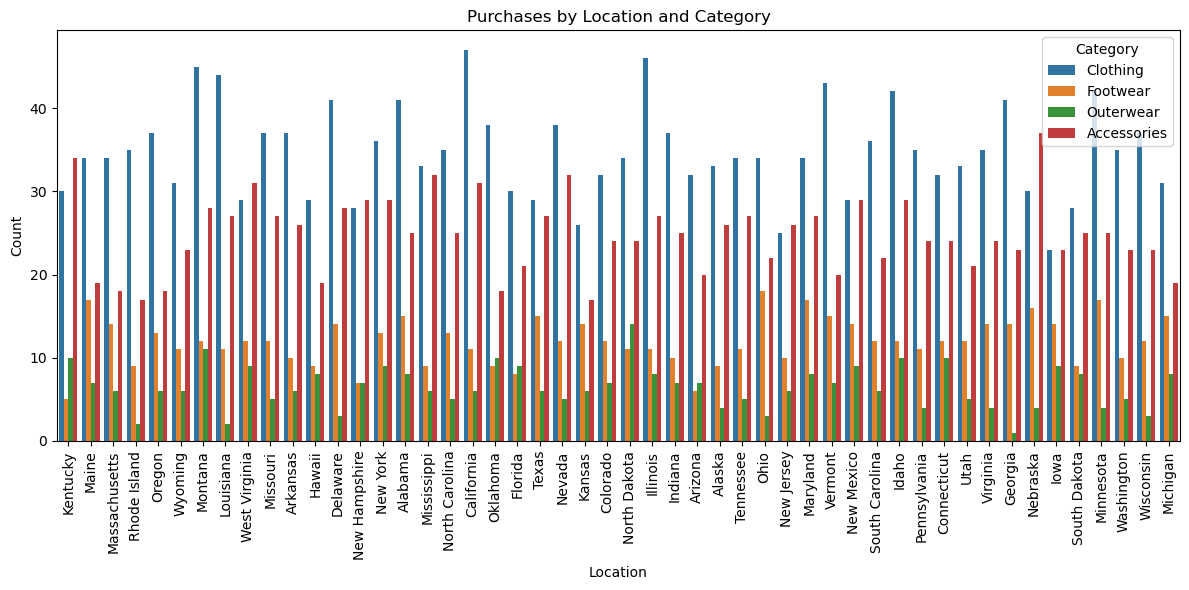

In [341]:
# Purchases by Location and Category
# Convert the dictionary to DataFrame

df = location_category_df

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(data=df, x='Location', hue='Category')

# Add title and labels
plt.title('Purchases by Location and Category')
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(title='Category', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


In [254]:
heatmap_data = location_category_df.pivot_table(index='Location', columns='Category', aggfunc='size', fill_value=0)
heatmap_data

Category,Accessories,Clothing,Footwear,Outerwear
Location,,,,
Alabama,25,41,15,8
Alaska,26,33,9,4
Arizona,20,32,6,7
Arkansas,26,37,10,6
California,31,47,11,6
Colorado,24,32,12,7
Connecticut,24,32,12,10
Delaware,28,41,14,3
Florida,21,30,8,9


In [340]:
# Initialize dictionaries to store top 5 and bottom 5 states for each category
top_5_states = {}
bottom_5_states = {}

# Iterate over each category
for category in heatmap_data.columns:
    # Sort the states based on their counts for the current category
    sorted_states = heatmap_data[category].sort_values()
    
    # Get the top 5 and bottom 5 states for the current category
    top_5 = sorted_states.tail(5)
    bottom_5 = sorted_states.head(5)
    
    # Store the top 5 and bottom 5 states in the dictionaries
    top_5_states[category] = top_5
    bottom_5_states[category] = bottom_5

# Print the top 5 and bottom 5 states for each category
print("Top 5 States for Each Category:")
print(top_5_states)
print("\nBottom 5 States for Each Category:")
print(bottom_5_states)


Top 5 States for Each Category:
{'Accessories': Location
West Virginia    31
Mississippi      32
Nevada           32
Kentucky         34
Nebraska         37
Name: Accessories, dtype: int64, 'Clothing': Location
Vermont       43
Louisiana     44
Montana       45
Illinois      46
California    47
Name: Clothing, dtype: int64, 'Footwear': Location
Nebraska     16
Minnesota    17
Maryland     17
Maine        17
Ohio         18
Name: Footwear, dtype: int64, 'Outerwear': Location
Connecticut     10
Kentucky        10
Oklahoma        10
Montana         11
North Dakota    14
Name: Outerwear, dtype: int64}

Bottom 5 States for Each Category:
{'Accessories': Location
Kansas           17
Rhode Island     17
Massachusetts    18
Oklahoma         18
Oregon           18
Name: Accessories, dtype: int64, 'Clothing': Location
Iowa             23
New Jersey       25
Kansas           26
New Hampshire    28
South Dakota     28
Name: Clothing, dtype: int64, 'Footwear': Location
Kentucky         5
Arizona   

In [273]:
max_df = heatmap_data.idxmax()

Category
Accessories        Nebraska
Clothing         California
Footwear               Ohio
Outerwear      North Dakota
dtype: object

In [277]:
min_df= heatmap_data.idxmin()

Category
Accessories      Kansas
Clothing           Iowa
Footwear       Kentucky
Outerwear       Georgia
dtype: object

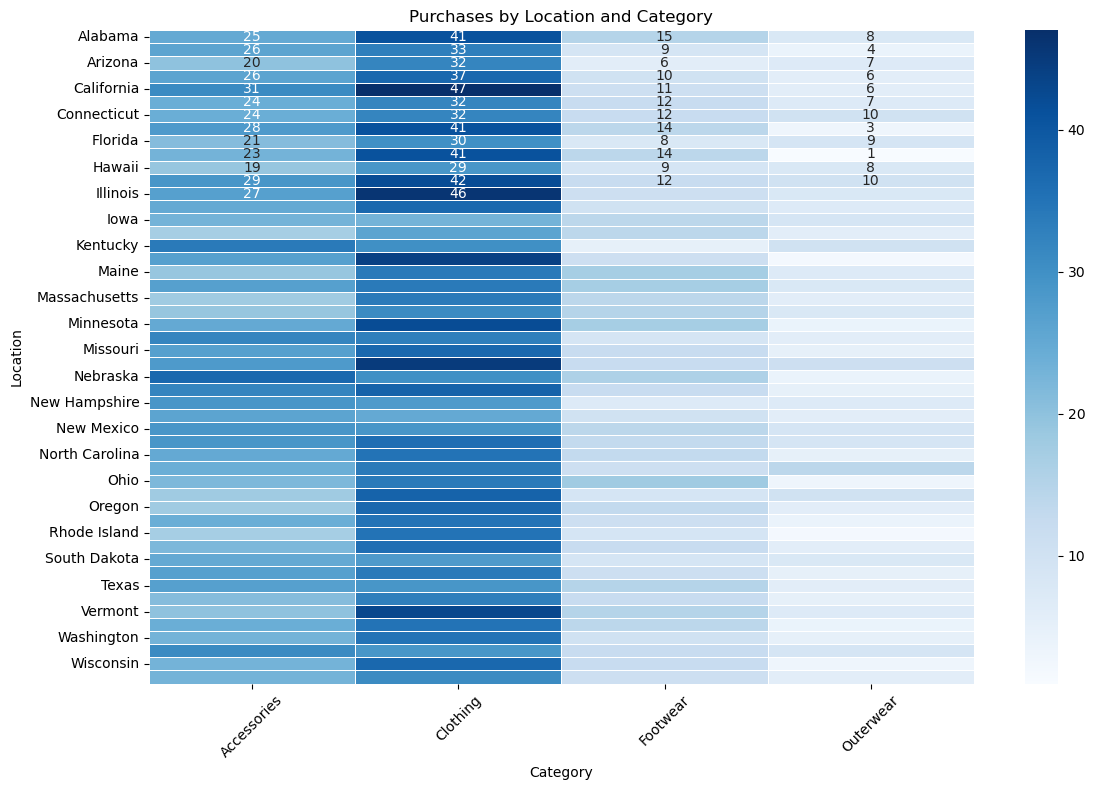

In [339]:
#Heatmap 
# Create a pivot table to count occurrences of each category in each location
heatmap_data = location_category_df.pivot_table(index='Location', columns='Category', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('Purchases by Location and Category')
plt.xlabel('Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

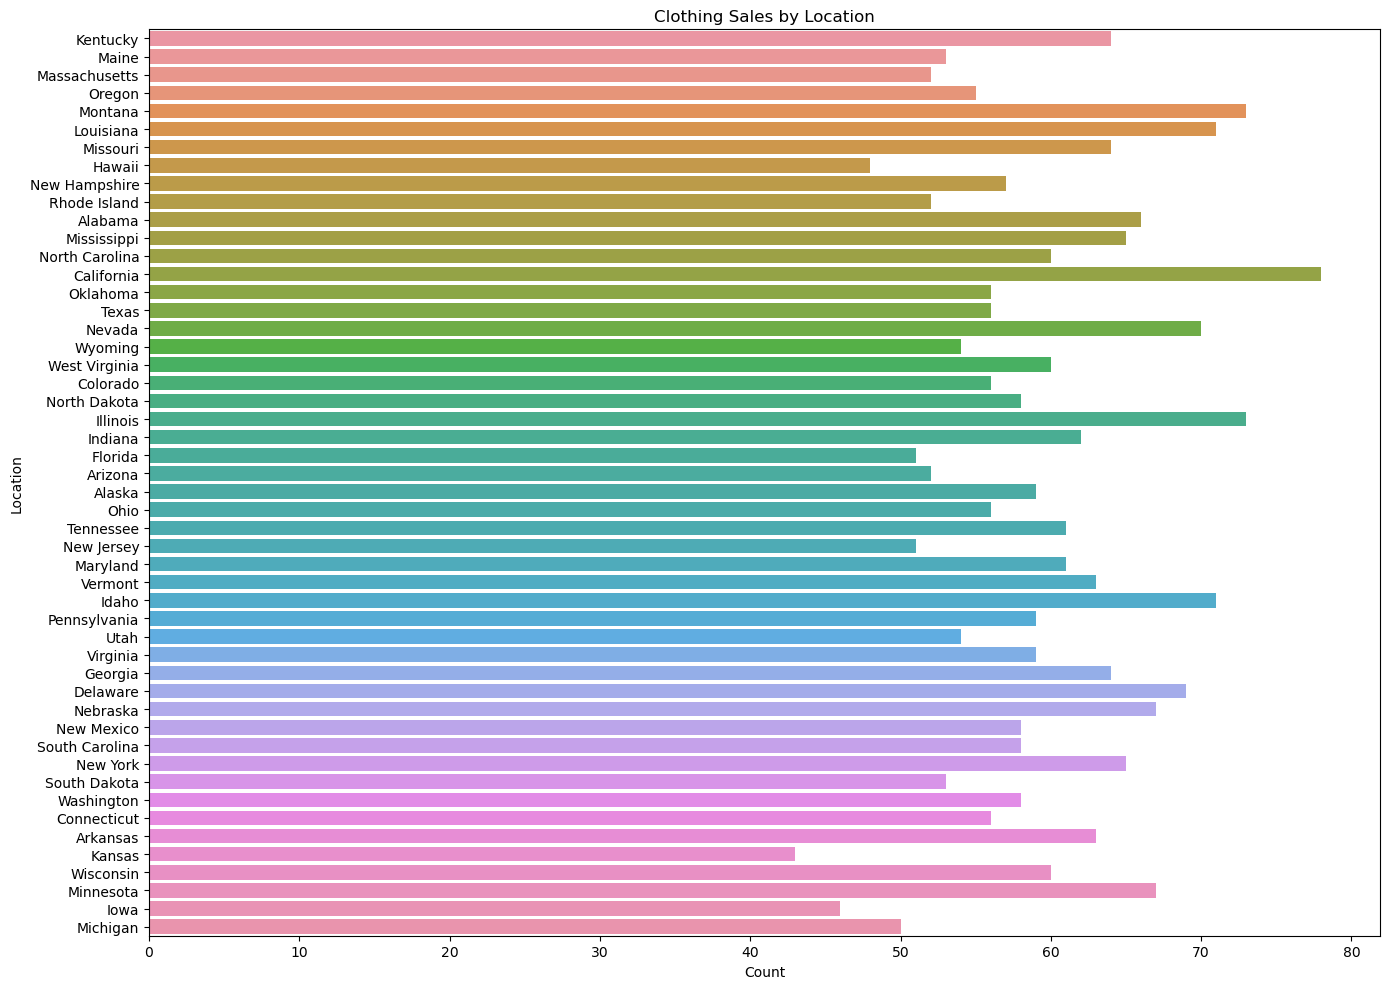

In [329]:
# Create the count plot
plt.figure(figsize=(14, 10))
sns.countplot(data=clothing_df, y='Location')
plt.title('Purchases by Location and Category')
plt.title('Clothing Sales by Location')
plt.ylabel('Location')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


top 5
Vermont       43
Louisiana     44
Montana       45
Illinois      46
California    47

bottom 5
Iowa             23
New Jersey       25
Kansas           26
New Hampshire    28
South Dakota     28

In [272]:
accessories_df= trends_df.loc[trends_df["Category"]== "Accessories", ["Location"]]
accessories_df

,Location
9,Missouri
16,Alabama
26,Nevada
28,North Carolina
30,North Carolina
...,...
3892,Michigan
3893,Massachusetts
3896,Iowa
3897,New Jersey


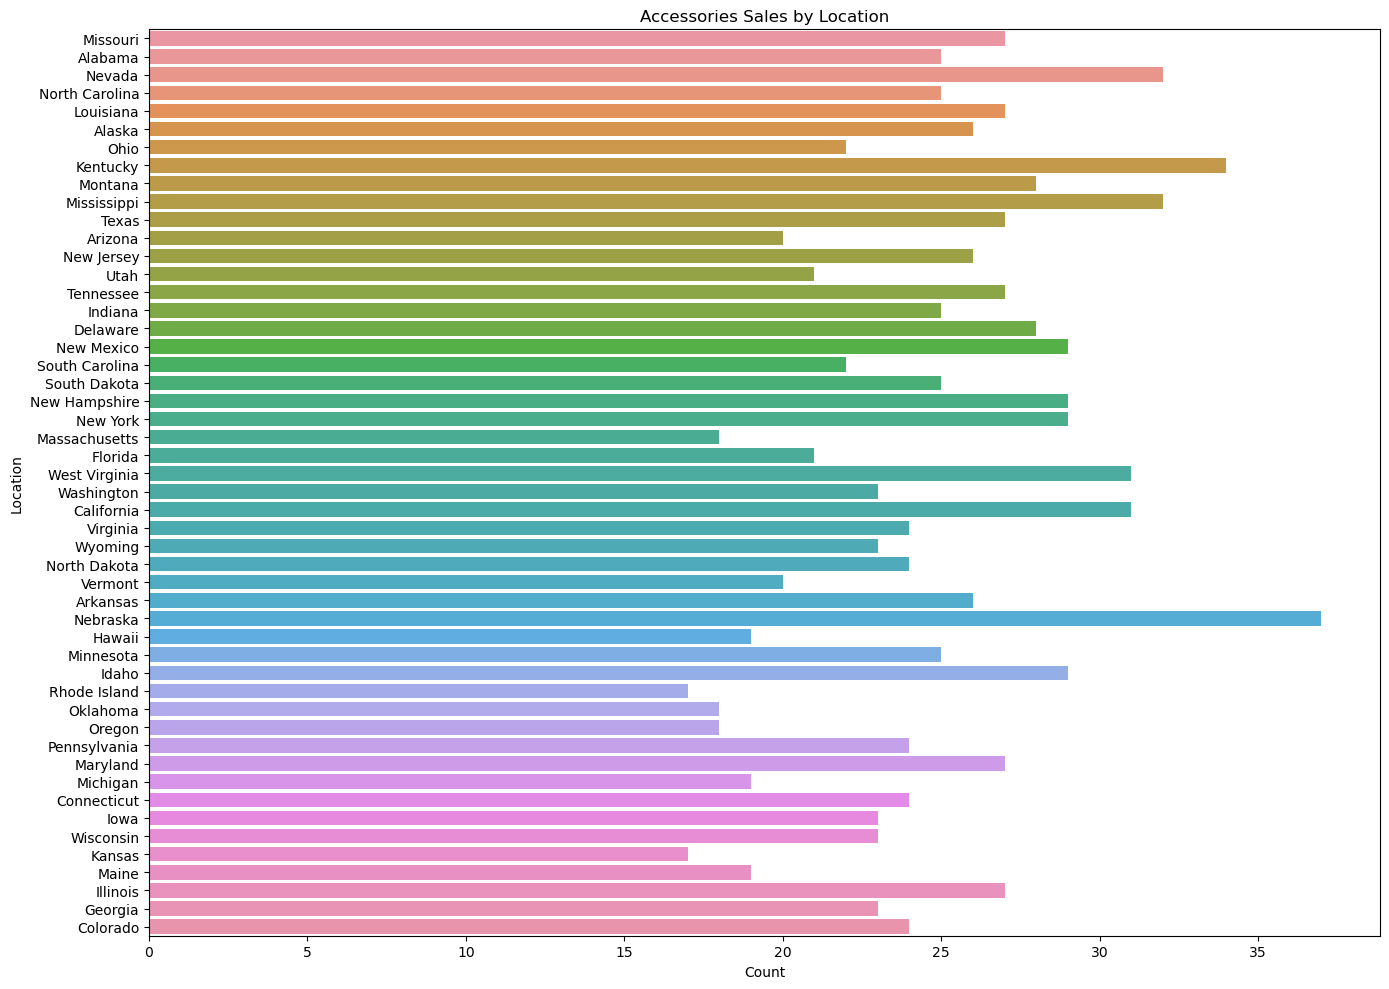

In [260]:
# Create the count plot
plt.figure(figsize=(14, 10))
sns.countplot(accessories_df, y='Location')
plt.title('Purchases by Location and Category')
plt.title('Accessories Sales by Location')
plt.ylabel('Location')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Top 5
Accessories: Location
West Virginia    31
Mississippi      32
Nevada           32
Kentucky         34
Nebraska         37

Bottom 5
Accessories': Location
Kansas           17
Rhode Island     17
Massachusetts    18
Oklahoma         18
Oregon           18

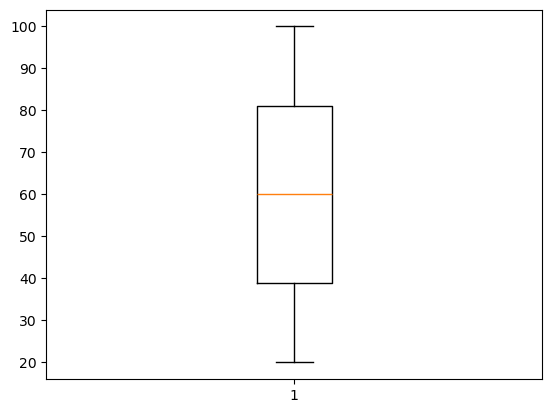

In [225]:
plt.boxplot(trends_df["Purchase Amount (USD)"])
plt.show()

our boxplot shows that there are no outliers for purchase Amount.




max Category
Accessories        Nebraska
Clothing         California
Footwear               Ohio
Outerwear      North Dakota
dtype: object

min Category
Accessories      Kansas
Clothing           Iowa
Footwear       Kentucky
Outerwear       Georgia
dtype: object



